# Overview

Preparing for a DS role requires a deep understanding of various machine learning algorithms, techniques, and best practices. There are tons of cheatsheets and Q&As in the internet but all of them are more focused towards the theory, which is necessary and important. I needed a quick hands-on cheatsheet so I created this notebook where I go through each topic with theoretical insights and hands-on examples.

The contents are:

1. **Supervised Learning Algorithms:** Including Linear Regression, Logistic Regression, Decision Trees, Random Forests, SVM, and k-NN.
1. **Unsupervised Learning Algorithms:** Focusing on k-Means and Hierarchical Clustering, as well as PCA for dimensionality reduction.
1. **Ensemble Methods:** Exploring Bagging and Boosting techniques.
1. **Neural Networks using PyTorch:** Covering the basics, activation functions, and backpropagation.
1. **Practice with ML Algorithms:** Discussing hyperparameter tuning and feature importance.

# 1. Supervised Learning Algorithms

## 1.1. Linear Regression

* **Goal:** Predict a continuous output variable (dependent var.) based on features (independent var.)
* **Equation:**

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon $$

- where $ \beta_0, \beta_1, \dots, \beta_n $ are the model parameters and $ \epsilon $ is the error term.


* **Optimization:** Least Squares
* **Assumptions:** Linearity, Independence, Homoscedasticity, Normality of errors
* **Regularization:** L1 (Lasso), L2 (Ridge)
  - L1 leads to sparse models, whereas L2 does not.
* **Advanced Considerations:**
  - **Bayesian Linear Regression:** Provides a probabilistic approach to linear regression, allowing for inference on the uncertainty of model parameters.
* **Pros & Cons:** Simple, interpretable, but sensitive to outliers.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

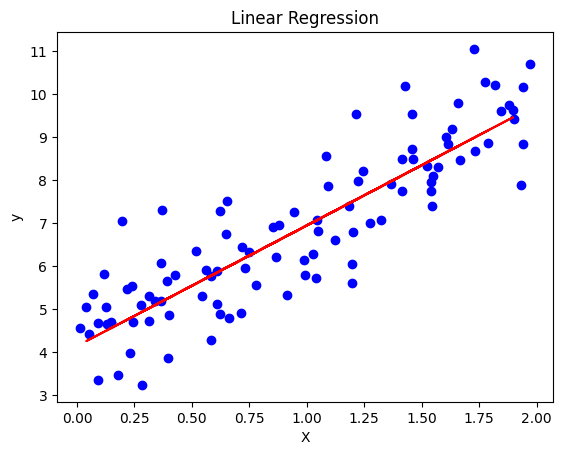

(array([[2.79932366]]), array([4.14291332]), 0.8085168605026132)

In [3]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model and fit it to the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plotting the results
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, 'r-')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

lin_reg.coef_, lin_reg.intercept_, rmse

In [4]:
# Importing necessary libraries for L1/L2 Regularization
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Lasso Regression (L1 Regularization)
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(ridge_reg.coef_, ridge_reg.intercept_, rmse_ridge)
print(lasso_reg.coef_, lasso_reg.intercept_, rmse_lasso)

[[2.69985029]] [4.23604] 0.8047442061334931
[2.50457141] [4.41885953] 0.811430172572564


## 1.2. Logistic Regression

* **Goal:** Predict a binary classification. The logistic function (or sigmoid function) is used to constrain the output between 0 and 1.
* **Equation:**

$$p(y = 1) = \frac{1}{1 + \exp(-z)}$$

- where 
$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$$



* **Optimization:** Maximum Likelihood Estimation
* **Assumptions:** Linearity of logit function, Independence of observations
* **Regularization:** L1 (Lasso), L2 (Ridge)
  - L1 leads to sparse models, whereas L2 does not.
* **Advanced Considerations:**
  - **Multinomial Logistic Regression:** When there are more than two classes, Multinomial Logistic Regression can be used.
* **Pros & Cons:** Probabilistic output, but may suffer from high bias for complex relationships.

In [5]:
from sklearn.datasets import make_classification

# Generate synthetic binary classification data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=42, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Importing necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Standard Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Logistic Regression with L1 Regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)

# Logistic Regression with L2 Regularization
log_reg_l2 = LogisticRegression(penalty='l2')
log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

accuracy, accuracy_l1, accuracy_l2


(1.0, 1.0, 1.0)

The `penalty` parameter specifies the type of regularization (`'l1'` or `'l2'`), and the `solver` parameter can vary based on the regularization chosen (e.g., `'liblinear'` for L1).

## 1.3. Decision Trees

* **Goal:** Classification or Regression.
* **Inspiration:** Split the feature space into regions and assign a label (or value, in the case of regression) to each region. 
* **Algorithm:** ID3, C4.5, CART
* **Splitting Criteria:** Gini impurity, Information Gain
* **Pruning:** Reduced Error Pruning, Cost Complexity Pruning
* **Advanced Considerations:**
  - **Information Gain:** The decision to split at each node is based on metrics like Information Gain, which is the difference in entropy before and after the split.
  - **Gini Impurity:** Another metric that measures how often a randomly chosen element would be incorrectly labeled.
  - **Pruning:** Techniques to trim down the tree to avoid overfitting, such as reduced error pruning or cost complexity pruning.
* **Pros & Cons:** Easily interpretable, but prone to overfitting.


They are hierarchical models, where each node makes a decision based on a feature, leading to child nodes until a leaf node (final decision) is reached. The tree is constructed to minimize some criterion like entropy or Gini impurity for classification problems.

In [7]:
# Generate synthetic binary classification data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Importing necessary libraries for Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Standard Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt)

# Decision Tree with Gini Impurity
dt_clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_clf_gini.fit(X_train, y_train)
y_pred_dt_gini = dt_clf_gini.predict(X_test)
report_dt_gini = classification_report(y_test, y_pred_dt_gini)

# Decision Tree with Information Gain (Entropy)
dt_clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_clf_entropy.fit(X_train, y_train)
y_pred_dt_entropy = dt_clf_entropy.predict(X_test)
report_dt_entropy = classification_report(y_test, y_pred_dt_entropy)

# Decision Tree with Pruning (Cost Complexity Pruning)
dt_clf_pruned = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
dt_clf_pruned.fit(X_train, y_train)
y_pred_dt_pruned = dt_clf_pruned.predict(X_test)
report_dt_pruned = classification_report(y_test, y_pred_dt_pruned)

print(report_dt, report_dt_gini, report_dt_entropy, report_dt_pruned)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
               preci

* **Standard Decision Tree:** Default settings with Gini impurity.
* **Decision Tree with Gini Impurity:** Explicitly set to use Gini impurity as a criterion.
* **Decision Tree with Information Gain (Entropy):** Set to use entropy as a criterion, which is a measure of information gain.
* **Decision Tree with Pruning (Cost Complexity Pruning):** Used a non-zero ccp_alpha to prune the tree and reduce complexity.

The `criterion` parameter specifies the measure to split nodes (either 'gini' for Gini Impurity or 'entropy' for Information Gain). The `ccp_alpha` parameter controls the complexity of the tree and is used for pruning.

## 1.4. Random Forests

* **Goal:** Ensemble method for classification and regression.
* **Inspiration:** Improve the predictive power and robustness of a single Decision Tree by averaging the results from multiple trees, each trained on a random subset of the data.
* **Base Learner:** Decision Trees
* **Aggregation:** Majority Vote or Average
* **Features:** Random Subset per Tree (Bagging)
* **Hyperparameters:** Number of Trees, Max Depth
* **Advanced Considerations:**
  - **Feature Importance:** Random Forests offer a straightforward way to evaluate feature importance, which is averaged over all the trees in the ensemble.
  - **Out-of-Bag Error:** Random Forest uses about two-thirds of the data for bootstrapping, and the remaining one-third (out-of-bag) can be used for validation, thus providing an unbiased performance metric.
* **Pros & Cons:** Robust and high-performing, but less interpretable.

In [9]:
# Importing necessary libraries for Random Forests
from sklearn.ensemble import RandomForestClassifier

# Standard Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf)

# Random Forest with Out-of-Bag Scoring
rf_clf_oob = RandomForestClassifier(oob_score=True, random_state=42, n_estimators=10)
rf_clf_oob.fit(X_train, y_train)
y_pred_rf_oob = rf_clf_oob.predict(X_test)
report_rf_oob = classification_report(y_test, y_pred_rf_oob)
oob_score = rf_clf_oob.oob_score_

# Feature Importance from Random Forest
feature_importance = rf_clf.feature_importances_

print(report_rf, report_rf_oob, oob_score, feature_importance)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
 0.975 [0.91854888 0.08145112]


## 1.5. Support Vector Machines (SVM)

* **Goal:** Find a hyperplane that best separates classes while maximizing the margin between the closest data points (support vectors).
* **Equation:** 

$$w⋅x+b=0$$

where $w$ is the normal vector to the hyperplane and $b$ is the bias term.

* **Kernel Methods:** Linear, Polynomial, RBF
* **Optimization:** Quadratic Programming
* **Margin:** Maximize the distance between the closest points (support vectors)
* **Hyperparameters:** Kernel, Regularization Parameter (C)
* **Advanced Considerations:**
  - **Kernel Methods:** When data is not linearly separable, kernel functions like polynomial or radial basis function (RBF) can be used to map the data to a higher dimension where it is linearly separable.
* **Pros & Cons:** Effective in high-dimensional spaces, but sensitive to feature scaling and outliers.


In [10]:
# Importing necessary libraries for SVM
from sklearn.svm import SVC

# Standard SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
report_svm_linear = classification_report(y_test, y_pred_svm_linear)

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=1)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
report_svm_rbf = classification_report(y_test, y_pred_svm_rbf)

# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', C=1, degree=3)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
report_svm_poly = classification_report(y_test, y_pred_svm_poly)

print(report_svm_linear, report_svm_rbf, report_svm_poly)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



## 1.6. k-Nearest Neighbors (k-NN)

* **Goal:** Classification or Regression.
* **Distance Metrics:** Euclidean, Manhattan, Cosine
* **k-Value:** Number of Neighbors
* **Weighting:** Uniform or Distance-based
* **Hyperparameters:** k, Distance Metric
* **Pros & Cons:** Simple and intuitive, but computationally expensive and sensitive to feature scaling.


In [11]:
# Importing necessary libraries for k-NN
from sklearn.neighbors import KNeighborsClassifier

# Standard k-NN with k=3 and Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_knn_euclidean = knn_euclidean.predict(X_test)
report_knn_euclidean = classification_report(y_test, y_pred_knn_euclidean)

# k-NN with k=3 and Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_knn_manhattan = knn_manhattan.predict(X_test)
report_knn_manhattan = classification_report(y_test, y_pred_knn_manhattan)

# k-NN with k=3, Euclidean distance, and distance-based weighting
knn_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
knn_weighted.fit(X_train, y_train)
y_pred_knn_weighted = knn_weighted.predict(X_test)
report_knn_weighted = classification_report(y_test, y_pred_knn_weighted)

print(report_knn_euclidean, report_knn_manhattan, report_knn_weighted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## General Points:

* **Scaling Sensitivity:** k-NN and SVM require feature scaling.
* **Outlier Sensitivity:** Linear Regression, SVM are sensitive to outliers.


# 2. Unsupervised Learning Algorithms

## 2.1. k-Means

* **Goal:** Partition data into k clusters.
* **Algorithm:** Each observation belongs to the cluster with the nearest mean. The algorithm iteratively assigns points to clusters and recalculates cluster centers until convergence.
* **Optimization:** Minimize within-cluster sum of squares
* **Hyperparameters:** k (Number of clusters), Initialization method
* **Advanced Considerations:**
  - **Mini-batch k-Means:** A variant that uses a random subset of data points in each iteration, speeding up convergence.
  - **Choosing k:** The number of clusters k is a hyperparameter. Methods like the Elbow method or the Silhouette method can be used to find an optimal k.
* **Pros & Cons:** Fast and scalable, but sensitive to initial conditions and requires specifying k.

In [12]:
# Generate synthetic data for clustering
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=4, n_clusters_per_class=1, n_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Importing necessary libraries for k-Means
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Standard k-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)
silhouette_kmeans = silhouette_score(X_test, y_pred_kmeans)

# Mini-batch k-Means with k=3
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
minibatch_kmeans.fit(X_train)
y_pred_minibatch = minibatch_kmeans.predict(X_test)
silhouette_minibatch = silhouette_score(X_test, y_pred_minibatch)

silhouette_kmeans, silhouette_minibatch

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0.4855918543439999, 0.4855918543439999)

In [14]:
# Corrected code for using the Elbow method to find the optimal number of clusters
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

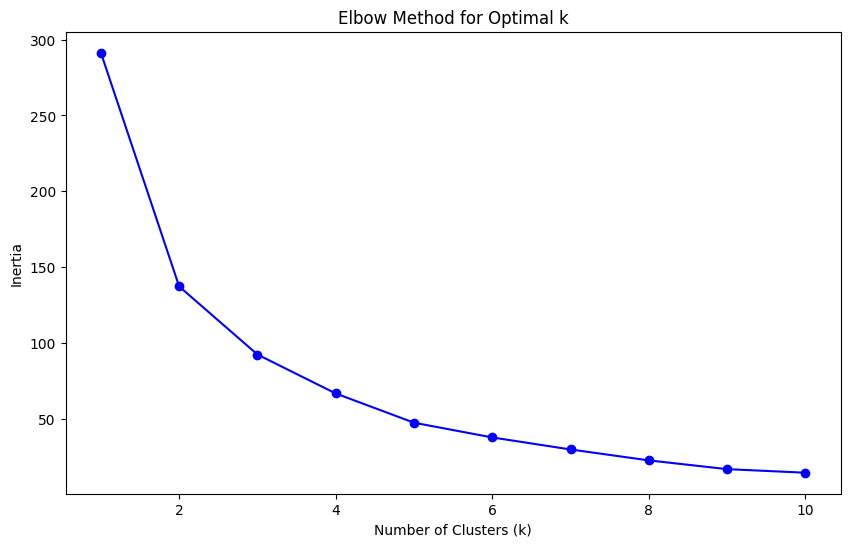

In [15]:
# Plotting the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## 2.2. Hierarchical Clustering

* **Goal:** Build a tree of clusters.
* **Algorithm:**
  - **Agglomerative:** Start with each data point as its own cluster and merge the closest pairs of clusters until only one cluster remains.
  - **Divisive:** Start with one cluster containing all points, and divide it into smaller clusters until each point forms its own cluster.
* **Linkage Criteria (closness of clusters):** Single, Complete, Average, Ward
* **Hyperparameters:** Number of clusters, Linkage method
* **Advanced Considerations:**
  - **Linkage Criteria:** The choice of linkage method can significantly affect the resulting hierarchy of clusters.
  - **Dendrogram:** A tree-like diagram that records the sequences of merges or splits.
* **Pros & Cons:** Provides a dendrogram, but computationally expensive for large datasets.

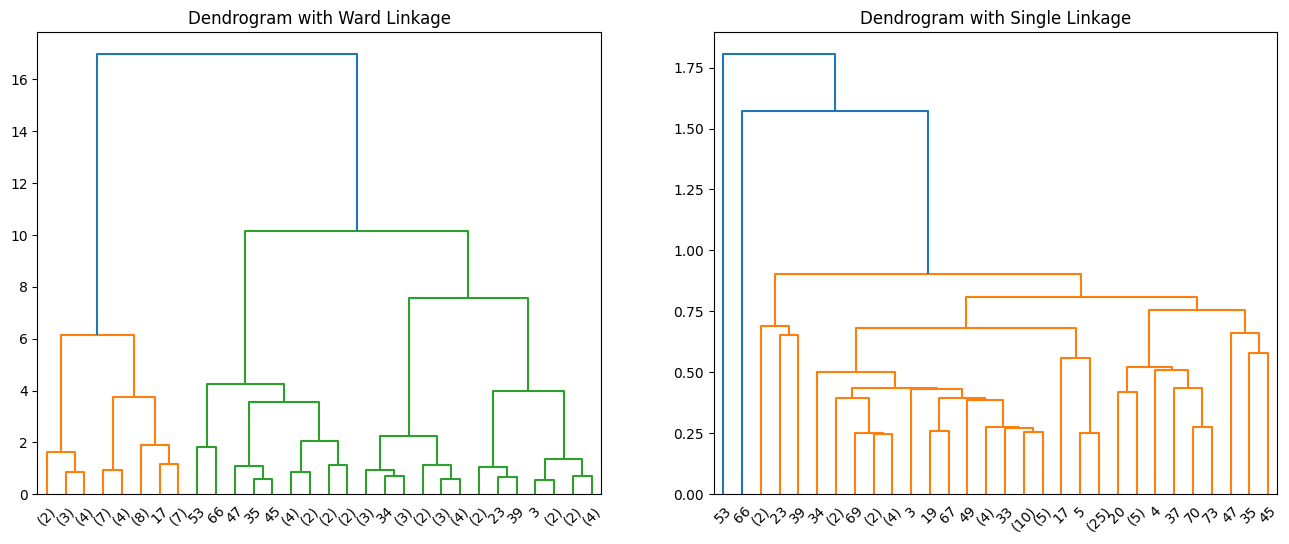

(0.47043473083189696, 0.3508141065408915)

In [16]:
# Importing necessary libraries for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix using 'ward' criterion
Z_ward = linkage(X_train, method='ward')

# Generate the linkage matrix using 'single' criterion
Z_single = linkage(X_train, method='single')

# Agglomerative Clustering with 'ward' criterion
agg_clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_pred_agg_ward = agg_clustering_ward.fit_predict(X_test)
silhouette_agg_ward = silhouette_score(X_test, y_pred_agg_ward)

# Agglomerative Clustering with 'single' criterion
agg_clustering_single = AgglomerativeClustering(n_clusters=3, linkage='single')
y_pred_agg_single = agg_clustering_single.fit_predict(X_test)
silhouette_agg_single = silhouette_score(X_test, y_pred_agg_single)

# Plotting dendrograms
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
dendrogram(Z_ward, ax=axes[0], truncate_mode='lastp')
axes[0].set_title('Dendrogram with Ward Linkage')
dendrogram(Z_single, ax=axes[1], truncate_mode='lastp')
axes[1].set_title('Dendrogram with Single Linkage')
plt.show()

silhouette_agg_ward, silhouette_agg_single

## 2.3. Principal Component Analysis (PCA)

* **Goal:** Dimensionality reduction.
* **Optimization:** Eigendecomposition or SVD
* **Hyperparameters:** Number of components
* **Advanced Considerations:**
  - **Explained Variance:** The amount of variance captured by each principal component.
  - **Whitening:** A preprocessing step that makes the observations resemble a standard Gaussian distribution with zero mean and unit variance. Whitening doesn't affect the explained variance but transforms the data so that the principal components are uncorrelated and have unit variance.
* **Pros & Cons:** Reduces dimensionality, but may lose interpretable features.

PCA is a dimensionality reduction technique that identifies the axes along which the data varies the most. It transforms the original variables into a new set of variables called principal components, which are orthogonal to each other and capture the maximum variance in the data.

In [17]:
# Importing necessary libraries for PCA
from sklearn.decomposition import PCA

# Standard PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_

# PCA with Whitening
pca_whiten = PCA(n_components=2, whiten=True)
X_pca_whiten = pca_whiten.fit_transform(X_train)
explained_variance_whiten = pca_whiten.explained_variance_ratio_

explained_variance, explained_variance_whiten

(array([0.71417288, 0.28582712]), array([0.71417288, 0.28582712]))

# 3. Ensemble Methods

## 3.1. Bagging


* **Goal:** Reduce variance through bootstrap aggregation.
* **Base Learner:** Any estimator (commonly Decision Trees)
* **Aggregation:** Majority Vote for classification, Average for regression
* **Hyperparameters:** Number of estimators, Max samples, Max features
* **Pros & Cons:** Reduces overfitting, but individual models should be high-variance.

In [19]:
# Importing necessary libraries for Bagging
from sklearn.ensemble import BaggingClassifier

# Standard Bagging with Decision Trees
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
report_bagging = classification_report(y_test, y_pred_bagging)

# Bagging with Out-of-Bag Evaluation
bagging_clf_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, oob_score=True, random_state=42)
bagging_clf_oob.fit(X_train, y_train)
y_pred_bagging_oob = bagging_clf_oob.predict(X_test)
report_bagging_oob = classification_report(y_test, y_pred_bagging_oob)
oob_score_bagging = bagging_clf_oob.oob_score_

print(report_bagging, report_bagging_oob, oob_score_bagging)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.80      0.67      0.73         6
           2       1.00      0.83      0.91         6

    accuracy                           0.85        20
   macro avg       0.87      0.83      0.84        20
weighted avg       0.86      0.85      0.85        20
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.80      0.67      0.73         6
           2       1.00      0.83      0.91         6

    accuracy                           0.85        20
   macro avg       0.87      0.83      0.84        20
weighted avg       0.86      0.85      0.85        20
 0.8875


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## 3.2. Boosting (e.g., AdaBoost, Gradient Boosting)

* **Goal:** Improve weak learners by focusing on mistakes.
* **Base Learner:** Any estimator (commonly Decision Trees)
* **Aggregation:** Weighted Majority Vote or Weighted Sum
* **Hyperparameters:** Number of estimators, Learning rate
* **Advanced Considerations:**
  - **AdaBoost:** One of the earliest and simplest boosting algorithms, where each subsequent model focuses on the misclassified samples from the previous models.
  - **Gradient Boosting:** Builds an additive model in a forward stage-wise manner; it allows for the optimization of arbitrary differentiable loss functions.
* **Pros & Cons:** High performance, but sensitive to noisy data and outliers.

In [21]:
# Importing necessary libraries for Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# AdaBoost with Decision Trees
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred_adaboost = adaboost_clf.predict(X_test)
report_adaboost = classification_report(y_test, y_pred_adaboost)

# Gradient Boosting
gradboost_clf = GradientBoostingClassifier(n_estimators=10, random_state=42)
gradboost_clf.fit(X_train, y_train)
y_pred_gradboost = gradboost_clf.predict(X_test)
report_gradboost = classification_report(y_test, y_pred_gradboost)

print(report_adaboost, report_gradboost)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.75      0.50      0.60         6
           2       1.00      0.83      0.91         6

    accuracy                           0.80        20
   macro avg       0.83      0.78      0.78        20
weighted avg       0.82      0.80      0.79        20
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.67      0.80         6
           2       1.00      0.83      0.91         6

    accuracy                           0.85        20
   macro avg       0.91      0.83      0.85        20
weighted avg       0.89      0.85      0.85        20



/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# 4. Neural Networks using PyTorch


## 4.1. Basics of Neural Networks

* **Goal:** Approximate any function through interconnected nodes.
* **Activation Functions:** ReLU, Sigmoid, Tanh
* **Optimization:** Backpropagation
* **Hyperparameters:** Learning rate, Batch size, Number of epochs
* **Pros & Cons:** Highly flexible, but computationally intensive and may overfit.

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors (assuming you have your data in numpy arrays)
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Define a simple neural network with one hidden layer and dropout
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 3)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.layer2(x)
        return x

# Initialize the model, loss, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)  # weight_decay for L2 regularization

# Train the model
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    test_output = model(X_test_tensor)
    _, predicted = torch.max(test_output.data, 1)
    correct = (predicted == y_test_tensor).sum().item()
    accuracy = correct / len(y_test_tensor)

print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.75


## 4.2. Activation Functions and Backpropagation

**Advanced Considerations:**

* **Leaky ReLU and Parametric ReLU:** Variants of ReLU to address the "dying ReLU" problem, where neurons never activate.
* **Softmax:** Often used in the output layer for multi-class classification problems to convert raw scores into probabilities.

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a neural network with Leaky ReLU and Softmax
class AdvancedNN(nn.Module):
    def __init__(self):
        super(AdvancedNN, self).__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 3)
        self.leaky_relu = nn.LeakyReLU(0.01)

    def forward(self, x):
        x = self.leaky_relu(self.layer1(x))
        x = nn.functional.softmax(self.layer2(x), dim=1)
        return x

# Initialize the model, loss, and optimizer
model = AdvancedNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model (assuming X_train_tensor and y_train_tensor are your training data)
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model (assuming X_test_tensor and y_test_tensor are your test data)
model.eval()
with torch.no_grad():
    test_output = model(X_test_tensor)
    _, predicted = torch.max(test_output.data, 1)
    correct = (predicted == y_test_tensor).sum().item()
    accuracy = correct / len(y_test_tensor)

print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.8


# 5. Practice with ML Algorithms

* **Classification Metrics:** accuracy, precision, recall, and F1-score
* **Regression Metrics:** RMSE (Root Mean Square Error) and MAE (Mean Absolute Error)
* **Advanced Considerations:**
  - **Hyperparameter Tuning:** Techniques like grid search and random search for optimizing model parameters.
  - **Feature Importance:** Understanding which features are most influential in making predictions.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Instantiate the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

# Fit the GridSearch to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a Random Forest Classifier with best parameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Get Feature Importances
feature_importances = best_rf.feature_importances_

best_params, best_score, feature_importances

({'max_depth': 30,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 10},
 0.9121557454890787,
 array([0.69439788, 0.30560212]))

## Exercise 1: Supervised Learning
Implement a Logistic Regression model on the Iris dataset and plot the decision boundary.

## Exercise 2: Unsupervised Learning
Use k-Means to cluster the Iris dataset and visualize the clustering. Try different values of k and evaluate them using the silhouette score.

## Exercise 3: Ensemble Methods
Implement a Random Forest Classifier on the Iris dataset. Use GridSearchCV to tune hyperparameters and report the feature importances.

## Exercise 4: Neural Networks (PyTorch)
Create a neural network in PyTorch to classify digits from the MNIST dataset. Experiment with different activation functions and report the results.

## Exercise 5: Advanced Techniques
Apply PCA on the Iris dataset and then use a classifier of your choice on the reduced dataset. Compare the results with the classifier applied to the original dataset.